# Linear Regression

## Reading the data frame.
The CSV file is "bitcoin.csv".  This data has been obtained from Kaggle and the following liner regression analysis has been performed on it. 

The data is imported into a pandas data frame and the first five lines are printed using the `head()` method. 

In [2]:
#importing pandas and reading the data. 

import pandas as pd
dataframe_btc = pd.read_csv('bitcoin.csv', sep=',')
dataframe_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,4/29/2013 23:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,4/30/2013 23:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,5/1/2013 23:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,5/2/2013 23:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,5/3/2013 23:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


## Displaying Information

`info()` method to collect more information about the data.

In [3]:
#info()

dataframe_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


## Creating training and test sets

Using the train_test_split() function to split the data set into training(75%) and test(25%) sets. 

In [4]:
from sklearn.model_selection import train_test_split

#Splitting the data.
train_set, test_set = train_test_split(dataframe_btc, test_size=0.25, random_state=123, shuffle=True)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

# Make a copy of the training set
working_set = train_set.copy()

2243 748
       SNo     Name Symbol              Date         High          Low  \
1408  1409  Bitcoin    BTC    3/7/2017 23:59  1275.550049  1204.800049   
838    839  Bitcoin    BTC   8/15/2015 23:59   266.666992   261.295990   
1993  1994  Bitcoin    BTC  10/13/2018 23:59  6308.510000  6259.810000   
2242  2243  Bitcoin    BTC   6/19/2019 23:59  9299.621044  9070.395994   
2526  2527  Bitcoin    BTC   3/29/2020 23:59  6250.467309  5920.086018   

             Open        Close        Volume     Marketcap  
1408  1273.209961  1223.540039  2.912560e+08  1.982477e+10  
838    265.528992   261.550995  1.932110e+07  3.792758e+09  
1993  6278.080000  6285.990000  3.064030e+09  1.088780e+11  
2242  9078.727603  9273.521766  1.554681e+10  1.647810e+11  
2526  6245.624627  5922.043123  2.837369e+10  1.083390e+11  
       SNo     Name Symbol             Date         High          Low  \
641    642  Bitcoin    BTC  1/30/2015 23:59   242.850998   225.839004   
1391  1392  Bitcoin    BTC  2/18/2

## Linear Regression

Performing a linear regression between "Open" and the "High" price. 

I have chosen `Open` and `High` price of the cryptocurrency in order to see the relation between these two prices. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linearRegression = LinearRegression()
X = working_set[["Open"]]
Y = working_set["High"]
print(linearRegression.fit(X, Y))

#Value of R2
print("value of R2")
print(linearRegression.score(X,Y))

#Calculating the Mean Squared Error
yPredicted = linearRegression.predict(X)
meanSquaredError = mean_squared_error(Y, yPredicted)
print("The value of Mean Squared Error is: ",  meanSquaredError)

# rmse = sqrt(meanSquaredError)
from math import sqrt
rmse = sqrt(meanSquaredError)
print("The root mean squared error is ", rmse)

LinearRegression()
value of R2
0.9987710387231933
The value of Mean Squared Error is:  164915.7227507638
The root mean squared error is  406.0981688591612


The value of R2 is 0.998 which is very close to 1 and it shows that the fit is great. The R2 value ranges from 0-1 with a perfect model having a R2 value of 1.

## Added features to X
Picked 3 other features in conjunction with Open price and performed the linear regression analysis. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

linearRegression = LinearRegression()
X = train_set[["Volume","Open","Marketcap","Open"]]
Y = train_set["High"]
print(linearRegression.fit(X, Y))

#value of R2
print("value of R2")
print(linearRegression.score(X,Y))

yPredicted = linearRegression.predict(X)
meanSquaredError = mean_squared_error(Y, yPredicted)
print("The value of Mean Squared Error is ",  meanSquaredError)

# rmse = sqrt(meanSquaredError)
from math import sqrt
rmse = sqrt(meanSquaredError)
print("The root mean squared error is ", rmse)

LinearRegression()
value of R2
0.9993931326798887
The value of Mean Squared Error is  81436.22146501929
The root mean squared error is  285.37032337827156


The addition of 3 extra parameters has changed the data slighlty. Here the R2 value is 0.99 which is very close to 1 and the error metrics are also comparatively lower, making this a model better than the previous one. 

## Final Evaluation of the test set

Performing a final evaluation of the test set by including 3 extra parameters.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 641 to 50
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        748 non-null    int64  
 1   Name       748 non-null    object 
 2   Symbol     748 non-null    object 
 3   Date       748 non-null    object 
 4   High       748 non-null    float64
 5   Low        748 non-null    float64
 6   Open       748 non-null    float64
 7   Close      748 non-null    float64
 8   Volume     748 non-null    float64
 9   Marketcap  748 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 64.3+ KB

LinearRegression()
0.9994568683960177
Mean Squared Error:  75744.28108339632
Root Mean Squared Error:  275.21678924694316

LinearRegression()
0.9992782369570844
Mean Squared Error:  100655.94120718264
Root Mean Squared Error:  317.2632049374504



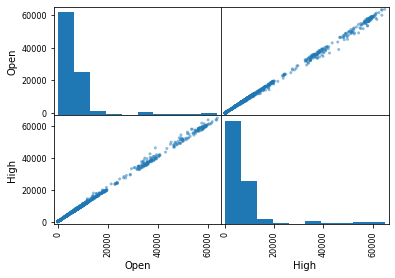

In [8]:
#Performing analysis on the testset
#Displaying data. 
test_set.head();
test_set.info()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Linear Regression
print()
linearRegression = LinearRegression()
X = test_set[["Volume","Open","Marketcap","Open"]]
Y = test_set["High"]
print(linearRegression.fit(X, Y))
print(linearRegression.score(X,Y))

#Mean Squared Error
yPredicted = linearRegression.predict(X)
meanSquaredError = mean_squared_error(Y, yPredicted)
print("Mean Squared Error: ",  meanSquaredError)

#Root Mean Squared Error. 
from math import sqrt
rmse = sqrt(meanSquaredError)
print("Root Mean Squared Error: ", rmse)
print()


#Unscaled features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linearRegression = LinearRegression()
X = test_set[["Open"]]
Y = test_set["High"]
print(linearRegression.fit(X, Y))

print(linearRegression.score(X,Y))

#MeanSquaredError
yPredicted = linearRegression.predict(X)
meanSquaredError = mean_squared_error(Y, yPredicted)
print("Mean Squared Error: ",  meanSquaredError)

#Root Mean Squared Error. 
from math import sqrt
rmse = sqrt(meanSquaredError)
print("Root Mean Squared Error: ", rmse)
print()


#Plotting the data in scatter Matrix. 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

feature = ['Open','High']
scatter_matrix(dataframe_btc[feature])
plt.show()

It can be inferred from the above analysis that most of the metrics and calculations are better than what we achieved in the last Part. Here the mean squared and root mean squared data are better and shows that it is overall a better model.

#### Comments and Discussion

It must be a result of using extra parameters to overfit the model, but the model did very well with 3 parameters. The metrics got better as more parameters were added. The volume and market cap I think would be two of the important parameters to look at for further data analysis. 